In [1]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from prepare import tts
from prepare import prep_telco

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
#prepared telco for modeling and setting the display to show all columns

pd.set_option('display.max_columns', None)
telco_p = prep_telco()

In [3]:
#strip dataset to only month to month, churn, and has internet or not
telco_p= telco_p[telco_p['contract_type'] == 'Month-to-month']
telco_p.head(3)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,signup_date,churn_month,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check,2021-04-21 18:07:34,NaN,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,2021-09-21 18:07:34,2022-01-31,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,2020-12-21 18:07:34,2022-01-31,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0


In [4]:
#separating into the train, validate, and test using train test split (tts function) from prepare.py
#stratify using 'churn'

telco_train, telco_v, telco_test = tts(telco_p)

stratify=churn


<AxesSubplot:xlabel='churn', ylabel='Count'>

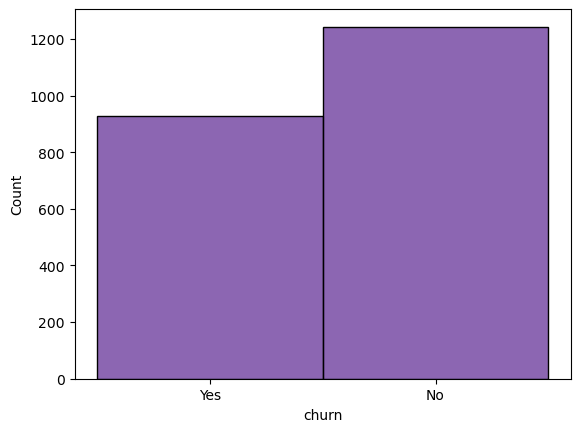

In [5]:
#visualizing the number of customers that have churned
sns.histplot(x='churn', data=telco_train, color='rebeccapurple')

# Question 3:
# Are customers with internet service more likely to churn?
$H_0$- Customers that churn are not significantly more likely to have internet service  
$H_a$- Customers that churn are significantly more likely to have internet service

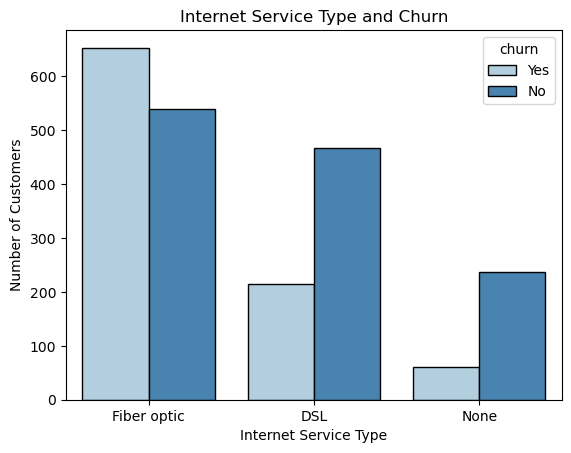

In [40]:
#visualizing the internet service type and churn

sns.countplot(x='internet_service_type', 
             data=telco_train, 
             hue='churn', 
             palette= 'Blues',
             order= ['Fiber optic', 'DSL', 'None'],
             edgecolor= 'black') 
plt.title('Internet Service Type and Churn')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
#Set alpha

alpha=.05

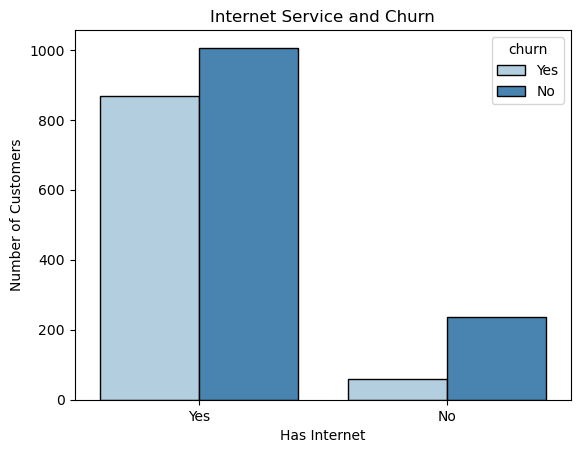

In [41]:
#adding a column for yes internet or no internet
d={'DSL': 'Yes', 'Fiber optic': 'Yes', 'None': 'No'}
telco_train['has_internet']= telco_train['internet_service_type'].map(d)

#visualization for customers that have churned and not that do and don't have internet
sns.countplot(x='has_internet', 
             data= telco_train,
             hue= 'churn',
             palette='Blues',
             edgecolor= 'black') 
plt.title('Internet Service and Churn')
plt.xlabel('Has Internet')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
#generating an observed crosstab
observed= pd.crosstab(telco_train.churn, telco_train.has_internet)

#doing a chi^2 test on the observed results
chi2, p, degf, expected = stats.chi2_contingency(observed)

#assigning the expected values to a dataframe
expected=pd.DataFrame(data=expected, 
                      index=['no churn', 'churn'], 
                      columns=['no internet', 'internet'])

#showing the results of the chi^2 test
print('observed values\n')
print(observed)
print('--------------\n')
print('expected values\n')
print(round(expected,1))
print('--------------\n')
print(f'chi^2= {chi2: .4f}')
print(f'p    = {p}')

In [ ]:
#check if the p value is less than our alpha

if p < alpha:
    print('reject the null hypothesis')
else:
    print('do not reject the null hypothesis')

# Question 2:
# Are customers without dependents more likely to churn?
$H_0$- Customers that churn are not more likely to have no dependents  
$H_a$- Customers that churn are more likely to have no dependents

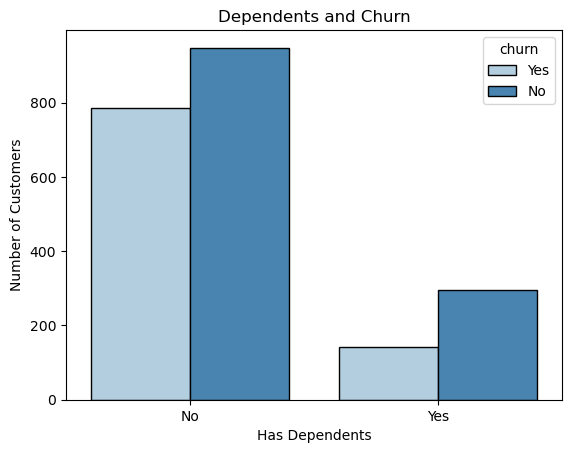

In [44]:
#visualizing customers with dependents

sns.countplot(x='dependents', 
             data= telco_train,
             hue= 'churn',
             palette='Blues',
             edgecolor= 'black') 
plt.title('Dependents and Churn')
plt.xlabel('Has Dependents')
plt.ylabel('Number of Customers')
plt.show()

In [45]:
#generating observed results
observed= pd.crosstab(telco_train.churn, telco_train.dependents)

#doing a chi^2 test on the observed results
chi2, p, degf, expected = stats.chi2_contingency(observed)

#assigning the expected values to a dataframe
expected=pd.DataFrame(data=expected, 
                      index=['no churn', 'churn'], 
                      columns=['no dependents', 'dependents'])

#showing the results of the chi^2 test
print('observed values\n')
print(observed)
print('--------------\n')
print('expected values\n')
print(round(expected,1))
print('--------------\n')
print(f'chi^2= {chi2: .4f}')
print(f'p    = {p}')

observed values

dependents   No  Yes
churn               
No          948  295
Yes         786  141
--------------

expected values

          no dependents  dependents
no churn          993.3       249.7
churn             740.7       186.3
--------------

chi^2=  23.4944
p    = 1.2527983026631775e-06


In [46]:
telco_dep= telco_p[telco_p['dependents'] =='No']

len(telco_p[telco_p['churn']== 'Yes']) / len(telco_p['churn'])

0.4270967741935484

In [47]:
telco_p['dependents'].value_counts()

No     3086
Yes     789
Name: dependents, dtype: int64

In [48]:
#dropping string columns that have been made into dummy vars
telco_train.drop(columns=['gender', 'dependents', 'partner', 'phone_service', 'multiple_lines',
                          'online_security', 'online_backup', 'device_protection', 'tech_support',
                          'streaming_tv', 'streaming_movies', 'paperless_billing', 'contract_type',
                          'internet_service_type', 'payment_type', 'churn_month', 'total_charges',
                          'signup_date', 'has_internet'], inplace=True)

telco_v.drop(columns=['gender', 'dependents', 'partner', 'phone_service', 'multiple_lines',
                          'online_security', 'online_backup', 'device_protection', 'tech_support',
                          'streaming_tv', 'streaming_movies', 'paperless_billing', 'contract_type',
                          'internet_service_type', 'payment_type', 'churn_month', 'total_charges',
                          'signup_date'], inplace=True)

telco_test.drop(columns=['gender', 'dependents', 'partner', 'phone_service', 'multiple_lines',
                          'online_security', 'online_backup', 'device_protection', 'tech_support',
                          'streaming_tv', 'streaming_movies', 'paperless_billing', 'contract_type',
                          'internet_service_type', 'payment_type', 'churn_month', 'total_charges',
                          'signup_date'], inplace=True)


#changing the strings in the 'churn' column to integers
for w in telco_train['churn']:
    if w == 'Yes':
        telco_train['churn'].replace('Yes', 1, inplace=True)
    else:
        telco_train['churn'].replace('No', 0, inplace=True)
        
for w in telco_v['churn']:
    if w == 'Yes':
        telco_v['churn'].replace('Yes', 1, inplace=True)
    else:
        telco_v['churn'].replace('No', 0, inplace=True)
        
for w in telco_test['churn']:
    if w == 'Yes':
        telco_test['churn'].replace('Yes', 1, inplace=True)
    else:
        telco_test['churn'].replace('No', 0, inplace=True)

In [49]:
telco_train.head()

,senior_citizen,tenure,monthly_charges,churn,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1875-QIVME,0,2,104.40,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0
3671-SHRSP,0,4,80.60,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1
0958-YHXGP,0,7,69.90,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
0396-HUJBP,0,2,19.30,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1
9497-QCMMS,1,1,93.55,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0


In [50]:
#separating train, validate, and test into x & y

x_train = telco_train.drop(columns=['churn'])
y_train = telco_train['churn']

x_val = telco_v.drop(columns=['churn'])
y_val = telco_v['churn']

x_test = telco_test.drop(columns=['churn'])
y_test = telco_test['churn']

In [51]:
#establishing baseline accuracy

#making base column
telco_train['base']= 0

#making the confusion matrix with actual churn results and baseline
cm= confusion_matrix(y_train, telco_train['base'])

#computing the accuracy
tn, fp, fn, tp= cm.ravel()

accuracy = (tp+tn) / (tn+fp+fn+tp)
print(f'The baseline accuracy is {accuracy}')

The baseline accuracy is 0.5728110599078341


In [52]:
#visualizing the best models

metrics=[]

for n in range(1, 11):
    for i in range(2, 11):
                                                        #making the model
        rf= RandomForestClassifier(max_depth=i,
                                   min_samples_leaf=n,
                                   random_state=8675309)
                                                        #fitting the model
        rf=rf.fit(x_train, y_train)
                                                        #evaluate accuracy on train and validate
        in_sample_accuracy= rf.score(x_train, y_train)
        out_of_sample_accuracy= rf.score(x_val, y_val)
        
                                                        #assign the output to a dictionary
        output= {
            'min_samples_per_leaf': n,
            'max_depth': i,
            'train_accuracy': in_sample_accuracy,
            'validate_accuracy': out_of_sample_accuracy
        }
        
                                                        #appending the output to a list
        metrics.append(output)
        
        
#turning metrics into a dataframe
df= pd.DataFrame(metrics)

#adding a difference column
df['difference']= df['train_accuracy']-df['validate_accuracy']

#sorting (decending) and taking the top results
df.sort_values(by=['validate_accuracy'], ascending=False).head(10)

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
42,5,8,0.768203,0.708602,0.059601
80,9,10,0.757604,0.707527,0.050077
69,8,8,0.753456,0.706452,0.047005
49,6,6,0.731797,0.706452,0.025346
88,10,9,0.747465,0.705376,0.042089
71,8,10,0.758986,0.703226,0.055760
61,7,9,0.765438,0.703226,0.062212
52,6,9,0.765899,0.703226,0.062673
86,10,7,0.735023,0.702151,0.032873
79,9,9,0.753917,0.702151,0.051767


In [53]:
#Creating the model
rf= RandomForestClassifier(max_depth=6,
                           min_samples_leaf=6,
                           random_state=8675309)

#fitting the model
rf.fit(x_train, y_train)

#evaluating the model with the test set
test_accuracy= rf.score(x_test, y_test)

#print total results
train_acc= df['train_accuracy'][49]
val_acc= df['validate_accuracy'][49]
print(f'train accuracy= {round(train_acc,2)}',
      f'validate accuracy= {round(val_acc,2)}',
      f'test accuracy= {round(test_accuracy,2)}')

train accuracy= 0.73 validate accuracy= 0.71 test accuracy= 0.69


<AxesSubplot:xlabel='churn', ylabel='Count'>

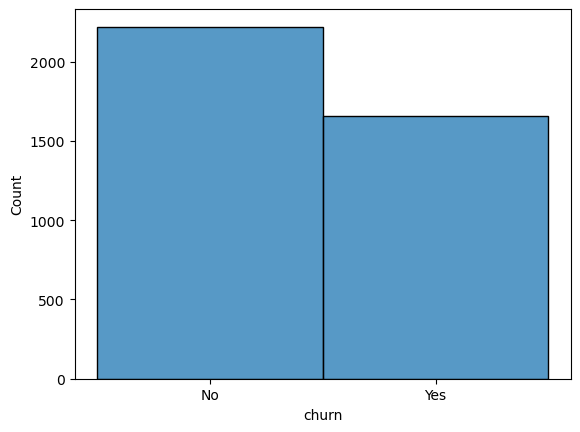

In [54]:
sns.histplot(x= 'churn', data= telco_p)

In [55]:
telco_p.value_counts('churn')

churn
No     2220
Yes    1655
dtype: int64

In [ ]:
round(len(telco_p[telco_p['churn']== 'Yes']) / len(telco_p['churn']), 2)

In [ ]:
d={'DSL': 'Yes', 'Fiber optic': 'Yes', 'None': 'No'}
telco_p['has_internet']= telco_p['internet_service_type'].map(d)

telco_int = telco_p[telco_p['has_internet']== 'Yes']

len(telco_int[telco_p['churn']== 'Yes']) / len(telco_int['churn'])

In [ ]:
telco_int['churn'].value_counts()

In [ ]:
sns.histplot(x=telco_int['churn'], data= telco_int)